In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


df = pd.read_json('binance.json')
df.head(10)

FileNotFoundError: ignored

In [2]:
df.dtypes

symbol                 object
priceChange           float64
priceChangePercent    float64
weightedAvgPrice      float64
prevClosePrice        float64
lastPrice             float64
lastQty               float64
bidPrice              float64
bidQty                float64
askPrice              float64
askQty                float64
openPrice             float64
highPrice             float64
lowPrice              float64
volume                float64
quoteVolume           float64
openTime                int64
closeTime               int64
firstId                 int64
lastId                  int64
count                   int64
dtype: object

In [3]:
df.isnull().sum()

symbol                0
priceChange           0
priceChangePercent    0
weightedAvgPrice      0
prevClosePrice        0
lastPrice             0
lastQty               0
bidPrice              0
bidQty                0
askPrice              0
askQty                0
openPrice             0
highPrice             0
lowPrice              0
volume                0
quoteVolume           0
openTime              0
closeTime             0
firstId               0
lastId                0
count                 0
dtype: int64

In [4]:
df.isna()

,symbol,priceChange,priceChangePercent,weightedAvgPrice,prevClosePrice,lastPrice,lastQty,bidPrice,bidQty,askPrice,...,openPrice,highPrice,lowPrice,volume,quoteVolume,openTime,closeTime,firstId,lastId,count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2416,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2417,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2418,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


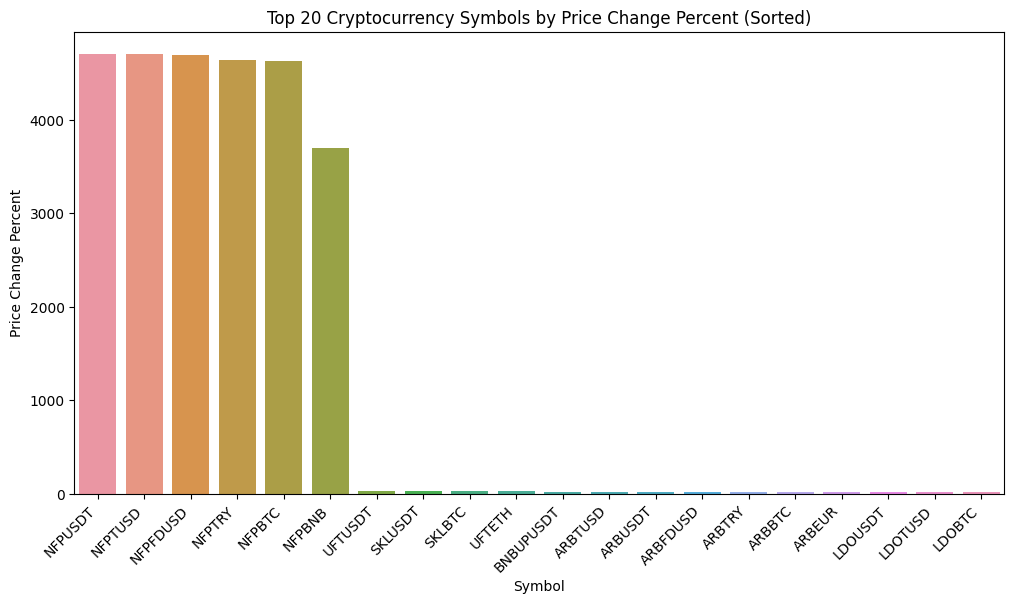

In [5]:
# The most volatile pairs.

df_sorted = df.sort_values(by='priceChangePercent', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='symbol', y='priceChangePercent', data=df_sorted)
plt.title('Top 20 Cryptocurrency Symbols by Price Change Percent (Sorted)')
plt.xlabel('Symbol')
plt.ylabel('Price Change Percent')
plt.xticks(rotation=45, ha='right')
plt.show()

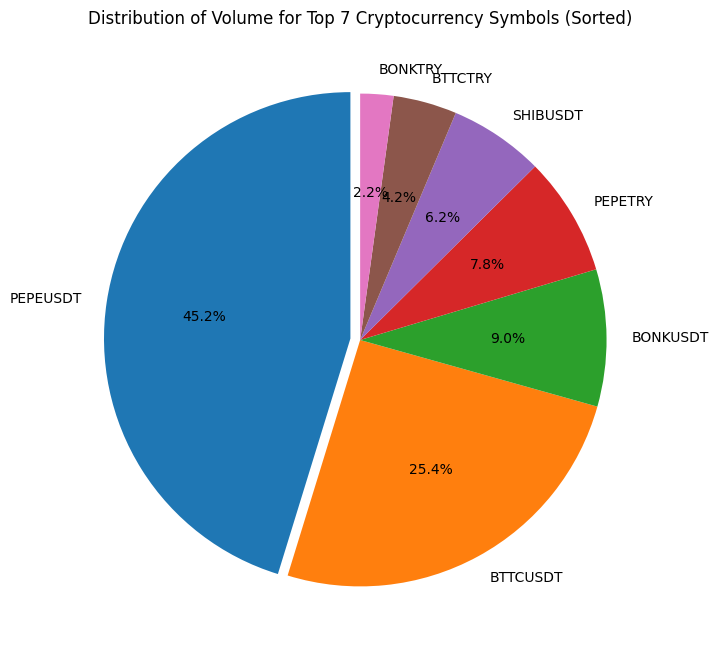

In [6]:
# The highest volume pairs.

df_sorted = df.sort_values(by='volume', ascending=False).head(7)
explode = (0.04, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(df_sorted['volume'], labels=df_sorted['symbol'], autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of Volume for Top 7 Cryptocurrency Symbols (Sorted)')
plt.show()

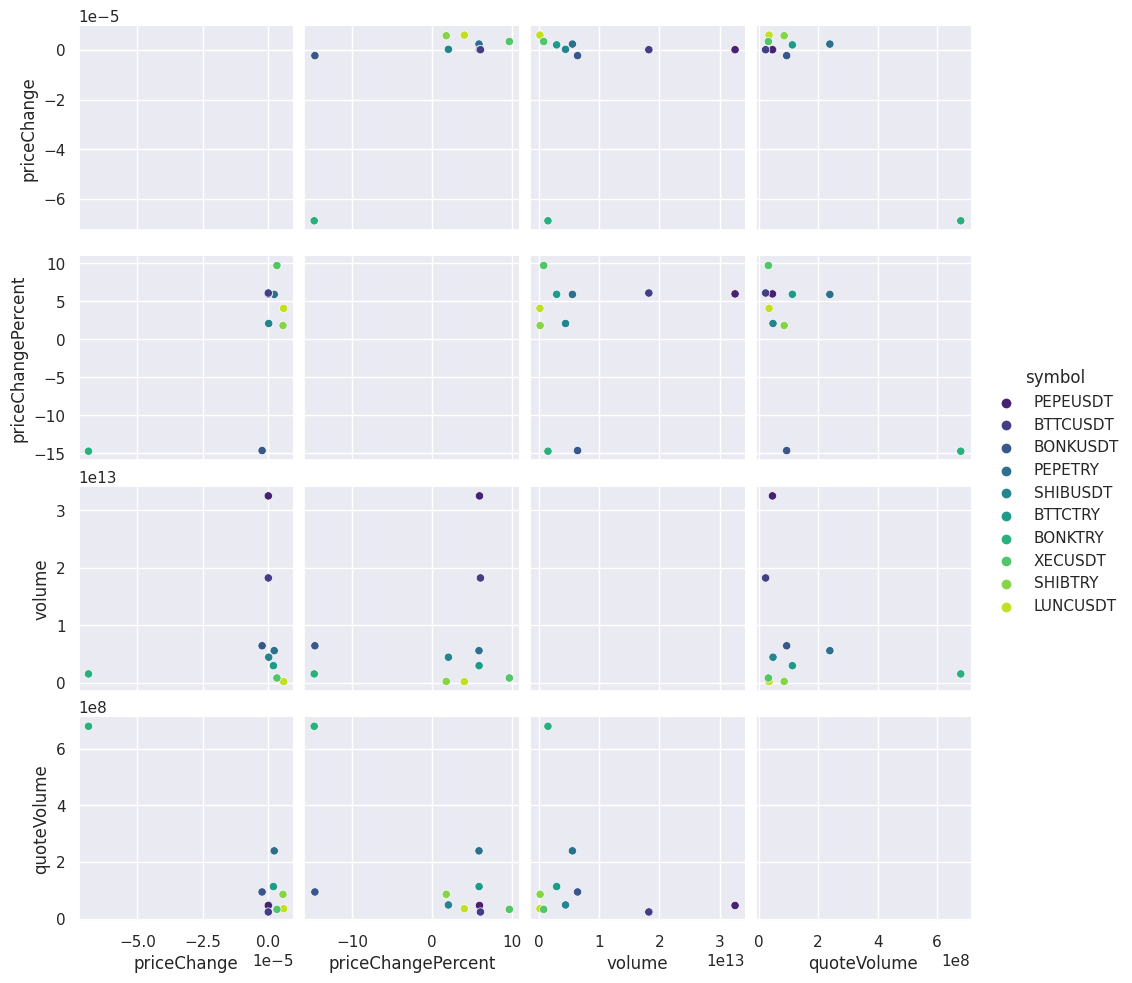

In [4]:
numerical_columns = [['priceChange'], ['priceChangePercent'], ['weightedAvgPrice'], ['prevClosePrice'],
                      ['lastPrice'], ['lastQty'], ['bidPrice'], ['bidQty'], ['askPrice'],
                      ['openPrice'], ['highPrice'], ['lowPrice'], ['volume'], ['quoteVolume']]

numerical_columns = [item for sublist in numerical_columns for item in sublist]
assert all(isinstance(col, str) for col in numerical_columns)

df['symbol'] = df['symbol'].astype('category')

numerical_columns_with_symbol = numerical_columns + ['symbol']
assert all(isinstance(col, str) for col in numerical_columns_with_symbol)

top_10_symbols = df.groupby('symbol')['volume'].sum().sort_values(ascending=False).head(10).index
df_top_10_symbols = df[df['symbol'].isin(top_10_symbols)]

sampled_fraction = 1
sampled_data = df_top_10_symbols.sample(frac=sampled_fraction)

sns.set(style="darkgrid")

selected_columns = ['priceChange', 'priceChangePercent', 'volume', 'quoteVolume']
sns.pairplot(sampled_data[selected_columns + ['symbol']], hue='symbol', palette='viridis', height=2.5, hue_order=top_10_symbols)

plt.show()

<ipython-input-7-dbccf3cac918>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = selected_df.corr()


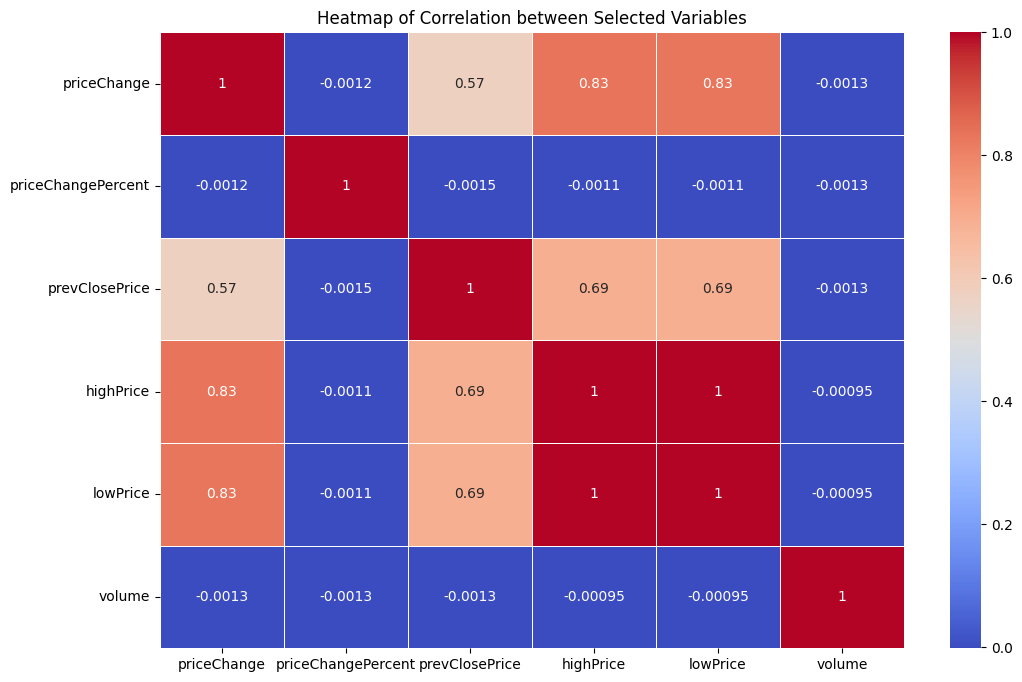

In [7]:
selected_columns = ['priceChange', 'priceChangePercent', 'prevClosePrice', 'highPrice', 'lowPrice', 'volume']
selected_df = df[['symbol'] + selected_columns]

correlation_matrix = selected_df.corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Heatmap of Correlation between Selected Variables')
plt.show()

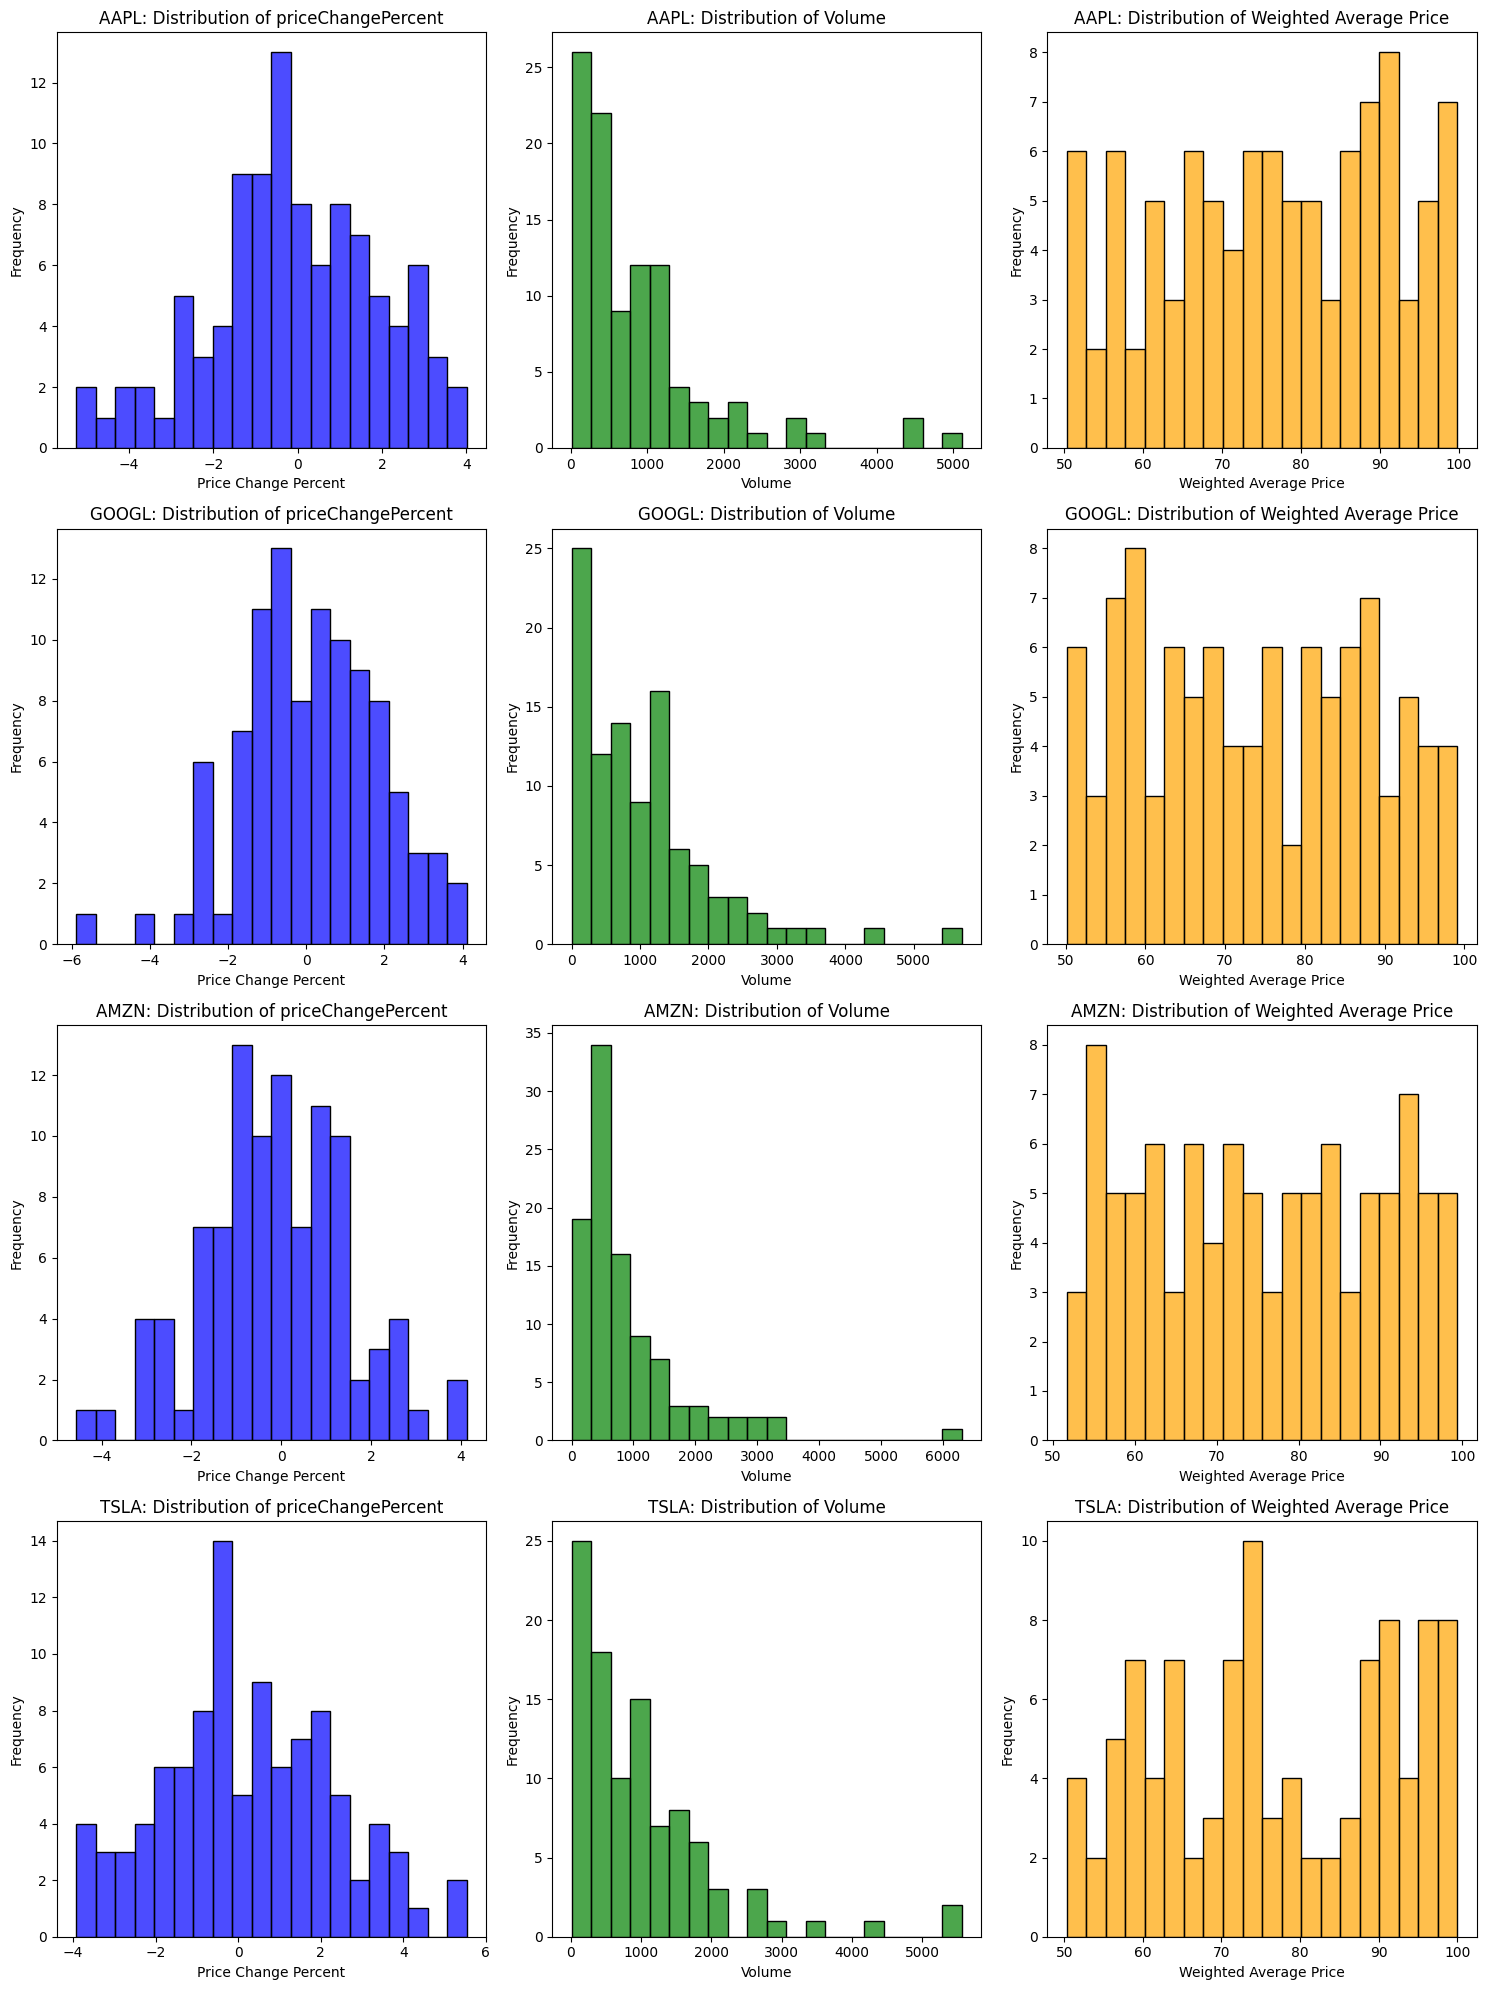

In [8]:
symbols = ['AAPL', 'GOOGL', 'AMZN', 'TSLA']

priceChangePercent_data = np.random.randn(4, 100) * 2
volume_data = np.random.exponential(1000, (4, 100))
weightedAvgPrice_data = np.random.uniform(50, 100, (4, 100))

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for i, symbol in enumerate(symbols):
    sns.histplot(priceChangePercent_data[i], bins=20, color='blue', alpha=0.7, ax=axs[i, 0])
    axs[i, 0].set_title(f'{symbol}: Distribution of priceChangePercent')
    axs[i, 0].set_xlabel('Price Change Percent')
    axs[i, 0].set_ylabel('Frequency')

    sns.histplot(volume_data[i], bins=20, color='green', alpha=0.7, ax=axs[i, 1])
    axs[i, 1].set_title(f'{symbol}: Distribution of Volume')
    axs[i, 1].set_xlabel('Volume')
    axs[i, 1].set_ylabel('Frequency')

    sns.histplot(weightedAvgPrice_data[i], bins=20, color='orange', alpha=0.7, ax=axs[i, 2])
    axs[i, 2].set_title(f'{symbol}: Distribution of Weighted Average Price')
    axs[i, 2].set_xlabel('Weighted Average Price')
    axs[i, 2].set_ylabel('Frequency')

plt.tight_layout()

plt.show()